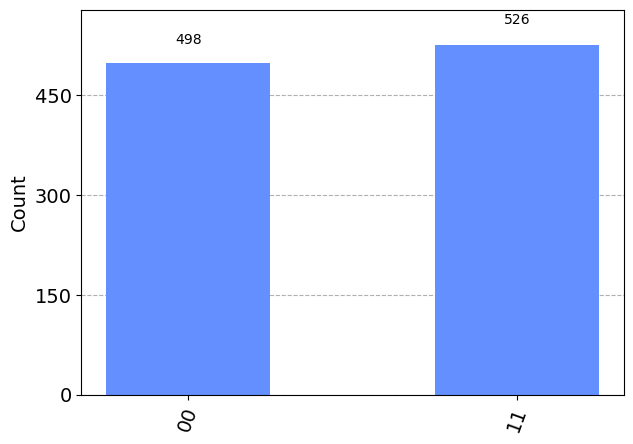

In [13]:
from qiskit import *
from qiskit.visualization import plot_histogram

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[1])

circuit.measure(qr, cr)   # measuring the Qbits of Quantum register and map them upon Cbits of C register
circuit.draw(output='mpl')

Simulator = Aer.get_backend('qasm_simulator')

Statistics = execute(circuit, backend= Simulator).result()

plot_histogram(Statistics.get_counts(circuit))

ibmqfactory.load_account:WARNING:2023-06-13 09:47:46,944: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


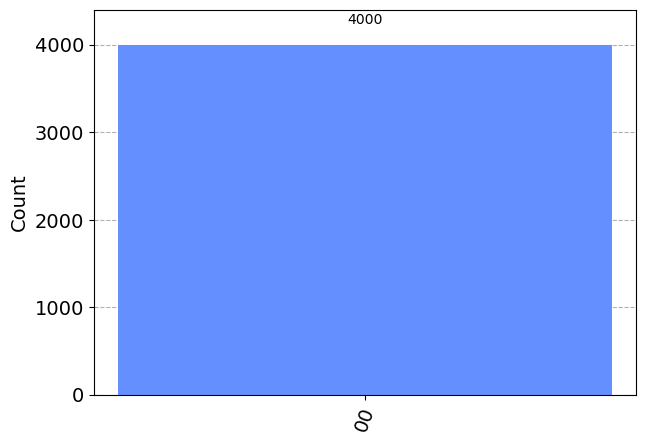

In [3]:
"Now running the above circuit on IBM Quantum Computer"

from qiskit import QuantumRegister, ClassicalRegister, IBMQ, QuantumCircuit
from qiskit.tools.monitor import job_monitor
from qiskit import *
from qiskit.visualization import plot_histogram as plt
IBMQ.load_account()

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[1])

provider = IBMQ.get_provider(hub='ibm-q', group = 'open', project='main')   #getting the device on which we want to run our code

Qcom = provider.get_backend('ibmq_lima')   #Naming the device on which we will be working

job = execute(circuit, backend = Qcom)     # the job we want to do is to execute the circuit at our Qcom

job_monitor(job)

result = job.result()
plt(result.get_counts(circuit))



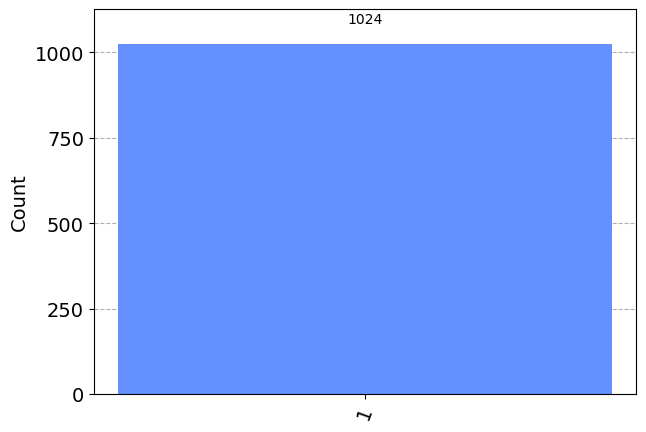

In [11]:
" How the gates acting on Qbits "


from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram

circuit = QuantumCircuit(1, 1)     # The first 1 rep Qbit (by default 0), and second rep Cbit(by default 1)

circuit.x(0)        #Applying Pauli X gate to first Qbit

simulator = Aer.get_backend('statevector_simulator')

result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
statevector.draw('latex')
"""
So Quantum states for individual Qbits can be represented 
on this sphere as any point throughuot the suface of the sphere.

"""
plot_bloch_multivector(statevector)

%matplotlib inline

circuit.draw(output = 'mpl')

circuit.measure([0], [0])

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()

counts = result.get_counts()

plot_histogram(counts)

In [14]:
"In order to get the matrix representation of the unitary"
from qiskit import *

circuit = QuantumCircuit(1, 1) # The first 1 rep Qbit (by default 0), and second rep Cbit(by default 1)

circuit.x(0)        #Applying Pauli X gate to first Qbit

simulator = Aer.get_backend('unitary_simulator')

result = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()

print(unitary)


Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


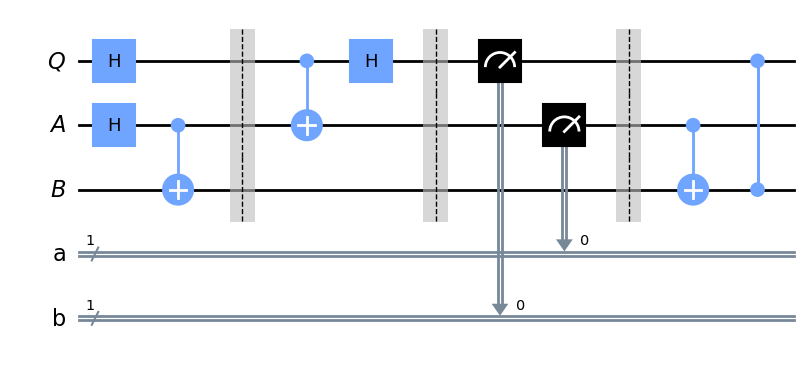

In [20]:
"""   Quantum Teleportation """

"Teleporting the information of qubit Q: 1/√2(|0⟩+ |1⟩) to qubit B = |0⟩ "

#Importing some libraries to encod Teleportation Circuit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

"qubits"
Qbit = QuantumRegister(1, 'Q')
ebit0 = QuantumRegister(1, 'A')   #ebit stands for Entangled bit
ebit1 = QuantumRegister(1, 'B')

"Cbits"
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

# A class in which Quantum circuit of teleportation is Coded
class Teleportation_Circuit:
    
    #Initiallizing Qbits and Cbits
    def __init__(self, Qbit, ebit0, ebit1, a, b):
        self.Qbit = Qbit
        self.ebit0 = ebit0
        self.ebit1 = ebit1
        self.a = a
        self.b = b
    

        self.qc = QuantumCircuit(self.Qbit, self.ebit0, self.ebit1, self.a, self.b)

        self.qc.h(self.Qbit)   #  Plus state creation

        "Creating Entangled State of A and B"
        self.qc.h(self.ebit0)
        self.qc.cx(self.ebit0, self.ebit1)
        self.qc.barrier()    
        
        "Applying CNOT to 'A' state using Qbit as  Control"
        self.qc.cx(Qbit, ebit0)
        self.qc.h(Qbit)
        self.qc.barrier()     
        
        'Measuring Qbits to classical bits'
        self.qc.measure(self.Qbit, self.b)
        self.qc.measure(self.ebit0, self.a)
        self.qc.barrier()
        
        "Apply CNOT and CZ gates on ebit1"
        self.qc.cx(self.ebit0, self.ebit1)
        self.qc.cz(self.Qbit, self.ebit1)
    
    #To print the state of ebit1 after Teleportation proccess
    def Print_state(self):
        self.simulator = Aer.get_backend('statevector_simulator')
        self.result = execute(self.qc, backend = self.simulator).result()
        self.statevector = self.result.get_statevector(self.qc)
        return Statevector(self.statevector)
    
    def Q_C_Returned(self):
        return self.qc
    
    "Attribute for drawing histogram of Qbits Probability maganitude"
    def Histogram(self):
        simulator = Aer.get_backend('qasm_simulator')
        result = execute(self.qc, backend = simulator, shots = 1024).result()
        counts = result.get_counts(self.qc)
        return plot_histogram(counts)



#Calling the class Teleportation_Circuit here        
Q_Circuit = Teleportation_Circuit(Qbit, ebit0, ebit1, a, b)

# Drawing the circuit
Q_Circuit.Q_C_Returned().draw(output='mpl')

# "call the attribute Histogram of Class Teleportation Circuit"
# Q_Circuit.Histogram()

# Printing the Quantum at the end
# Q_Circuit.Print_state()